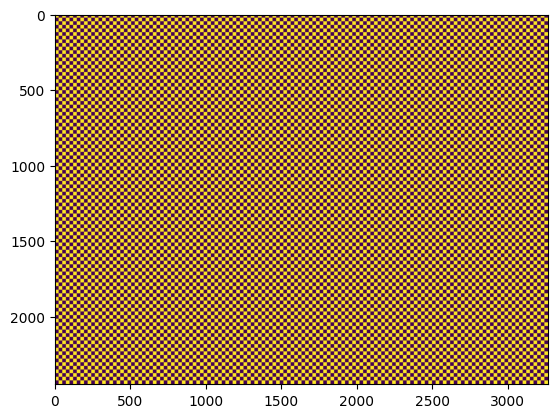

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from atypic.effects import RollPixelsEffect, RandomRollPixelsEffect, ColorValueEffect, ColorChannelSplitEffect, CorruptionEffect, SortEffect, ColorPaletteReductionEffect
from atypic.mask import Mask
import random
# Load input image
frame = cv2.imread('SUNP0001.JPG')

# Make a mask
mask_obj = Mask(frame)
# instr = [lambda beh: mask_obj.create_rectangle_mask((frame.shape[0]//random.randint(1,20), frame.shape[1]//random.randint(1,20)), (frame.shape[0]//random.randint(1,20), frame.shape[1]//random.randint(1,20)), behavior=beh),
# mask_obj.create_circle_mask((0.5,0.5),0.25),
# mask_obj.create_polygon_mask([(0.25, 0.25), (0.25, 0.75), (0.75, 0.75), (0.75, 0.25)]),
# mask_obj.create_ellipse_mask((0.5,0.5), (0.25,0.25), angle=30),
mask_obj.create_checkerboard_mask(block_size=0.01),
# lambda beh: mask_obj.create_band_mask('horizontal', frame.shape[0]//random.randint(1,20), frame.shape[0]//random.randint(1,20), behavior=beh)]
plt.imshow(mask_obj.mask)

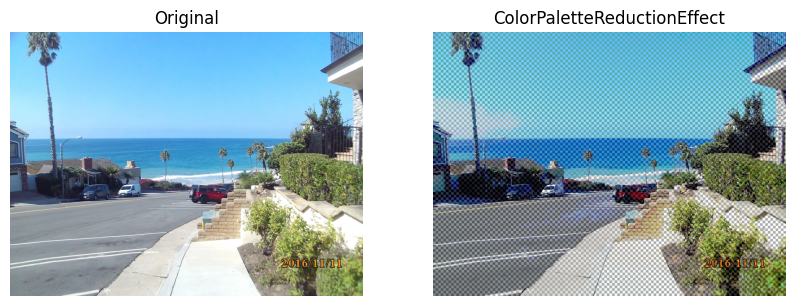

In [14]:
# ColorPaletteReductionEffect demo
palette_effect = ColorPaletteReductionEffect(frame, num_colors=4, mask=mask_obj.mask)
palette_out = palette_effect.apply()
cv2.imwrite('output_palette_reduction.jpg', palette_out)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(palette_out, cv2.COLOR_BGR2RGB))
ax[1].set_title('ColorPaletteReductionEffect')
ax[1].axis('off')
plt.show()

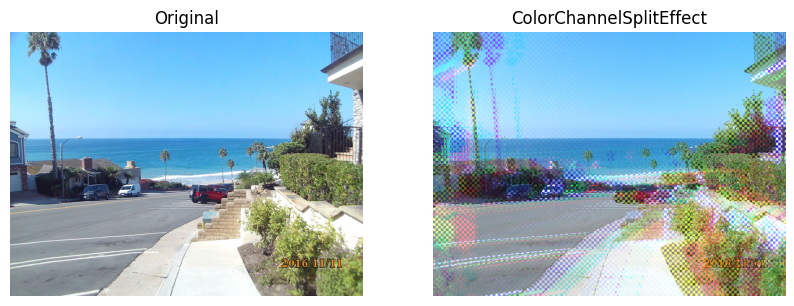

In [15]:
# ColorChannelSplitEffect demo
channel_split_effect = ColorChannelSplitEffect(frame, split_distance=100, which='row', order='bgr', mask=mask_obj.mask)
channel_split_out = channel_split_effect.apply()
cv2.imwrite('output_channel_split.jpg', channel_split_out)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(channel_split_out, cv2.COLOR_BGR2RGB))
ax[1].set_title('ColorChannelSplitEffect')
ax[1].axis('off')
plt.show()

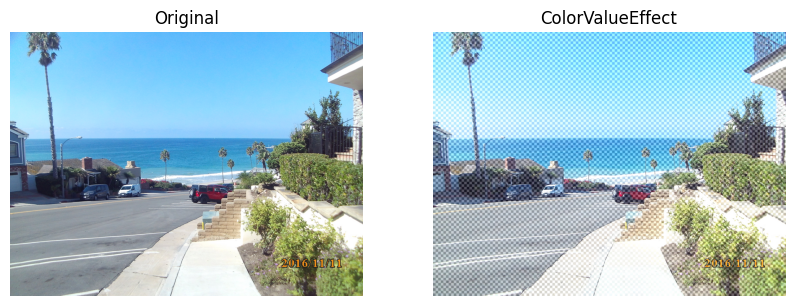

In [16]:
# ColorValueEffect demo
color_value_effect = ColorValueEffect(frame, shift_value=60, mask=mask_obj.mask)
color_value_out = color_value_effect.apply()
cv2.imwrite('output_colorvalue.jpg', color_value_out)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(color_value_out, cv2.COLOR_BGR2RGB))
ax[1].set_title('ColorValueEffect')
ax[1].axis('off')
plt.show()

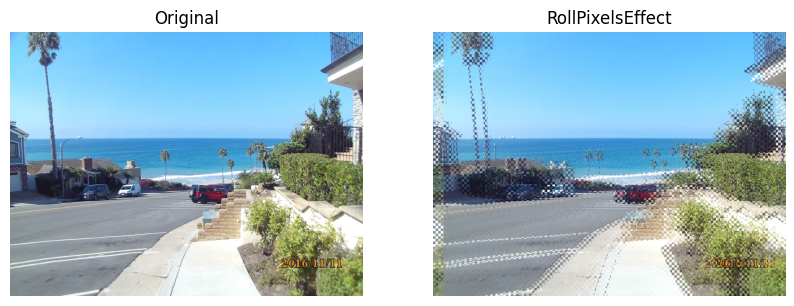

In [17]:
# RollPixelsEffect demo

roll_effect = RollPixelsEffect(frame, which='row', shift_length=50, mask=mask_obj.mask)
roll_out = roll_effect.apply()
cv2.imwrite('output_rollpixels.jpg', roll_out)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(roll_out, cv2.COLOR_BGR2RGB))
ax[1].set_title('RollPixelsEffect')
ax[1].axis('off')
plt.show()

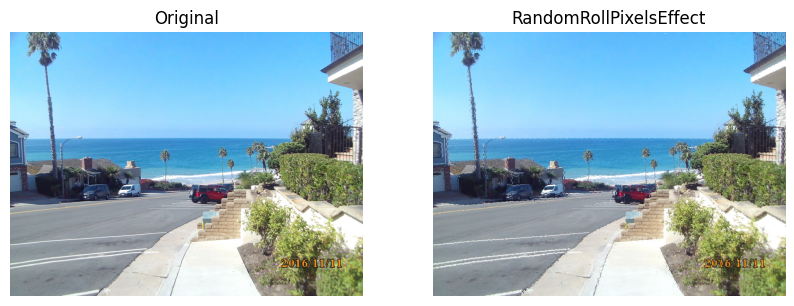

In [18]:
# RandomRollPixelsEffect demo
from atypic.effects import RandomRollPixelsEffect
random_effect = RandomRollPixelsEffect(frame, which='col', group_size=20, shift_range=(10, 50), mask=mask_obj.mask)
random_out = random_effect.apply()
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(random_out, cv2.COLOR_BGR2RGB))
ax[1].set_title('RandomRollPixelsEffect')
ax[1].axis('off')
plt.show()

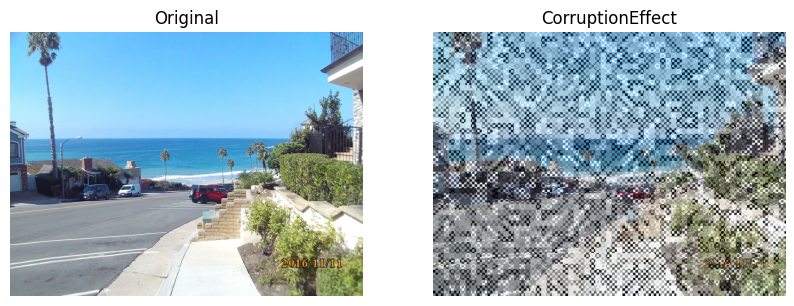

In [19]:
# CorruptionEffect demo
from atypic.effects import CorruptionEffect
corruption_effect = CorruptionEffect(frame, bitsize=50, mask=mask_obj.mask)
corruption_out = corruption_effect.apply()
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(corruption_out, cv2.COLOR_BGR2RGB))
ax[1].set_title('CorruptionEffect')
ax[1].axis('off')
plt.show()

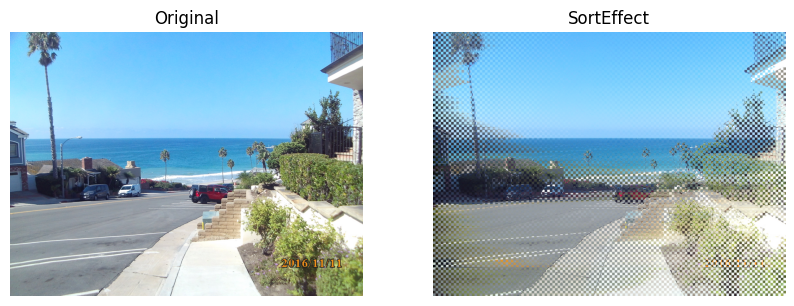

In [ ]:
# SortEffect demo
from atypic.effects import SortEffect
sort_effect = SortEffect(frame, which='row', mask=mask_obj.mask)
sort_out = sort_effect.apply()
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(sort_out, cv2.COLOR_BGR2RGB))
ax[1].set_title('SortEffect')
ax[1].axis('off')
plt.show()

[[100 100]
 [200 100]
 [150 200]]
(269, 451, 3)


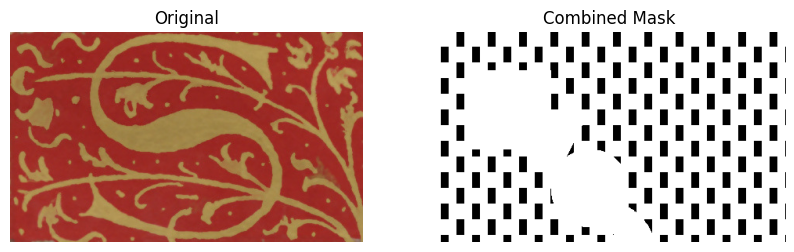

In [21]:
# Mask creation demo
import cv2
import numpy as np
import matplotlib.pyplot as plt

frame = cv2.imread('input.jpg')
mask_obj = Mask(frame)
mask_obj.create_rectangle_mask((50, 50), (150, 150))
mask_obj.create_circle_mask((200, 200), 50)
mask_obj.create_polygon_mask([(100,100),(200,100),(150,200)])
mask_obj.create_ellipse_mask((250,250), (40,20), angle=45)
# mask_obj.create_band_mask(orientation='horizontal', start=60, end=80)
mask_obj.create_checkerboard_mask(block_size=20)
mask_obj.create_stripe_mask(orientation='vertical', stripe_width=10, gap=10)
# mask_obj.create_full_mask()
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(mask_obj.mask, vmin=0, vmax=255, cmap='gray')
ax[1].set_title('Combined Mask')
ax[1].axis('off')
print(frame.shape)
plt.show()